In [6]:
%load_ext autoreload
%autoreload 2

import pyart
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import os
from netCDF4 import num2date, date2num
from optparse import OptionParser
import sys 
import glob
import gc
from pyproj import Proj, Geod
import h5py

%matplotlib notebook

### Ängelholm radar
file1_ang_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/seang-PPIVol-20190613-010000-4b6d.hdf' 
file2_ang_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/seang-PPIVol-20190613-010103-4b73.hdf' 
file1_ang_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/seang-PPIVol-20190613-010000-4c6e.hdf' 
file2_ang_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/seang-PPIVol-20190613-010103-4c6f.hdf' 

### Bålsta radar
file1_baa_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/sebaa-PPIVol-20190613-030000-4b69.hdf' 

### Hemse radar
file1_hem_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/sehem-PPIVol-20190613-010000-4b6b.hdf'
file2_hem_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/sehem-PPIVol-20190613-010104-4b6e.hdf'
file1_hem_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/sehem-PPIVol-20190613-010000-4c76.hdf'
file2_hem_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/sehem-PPIVol-20190613-010104-4c74.hdf'

### Karlskrona radar
file1_kaa_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/sekaa-PPIVol-20190613-010000-4b6a.hdf'
file2_kaa_16bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_16bit/sekaa-PPIVol-20190613-010106-4b6c.hdf'
file1_kaa_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/sekaa-PPIVol-20190613-010000-4c73.hdf'
file2_kaa_8bit= '/data/proj/radar/edge/unfiltered/odimh5v2_2_eec_8bit/sekaa-PPIVol-20190613-010106-4c70.hdf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Manipulate hdf5 files with Pyart

In [7]:
rad1_ang_16= pyart.aux_io.odim_h5.read_odim_h5_split(file1_ang_16bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_ang_16= pyart.aux_io.odim_h5.read_odim_h5_split(file2_ang_16bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

rad1_ang_8= pyart.aux_io.odim_h5.read_odim_h5_split(file1_ang_8bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_ang_8= pyart.aux_io.odim_h5.read_odim_h5_split(file2_ang_8bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

In [8]:
### this is to extract the different sweeps from LDR files (at ele 0.5, 1.25, 2)
# radar ANG
rad1_ang_16_05el= rad1_ang_16.extract_sweeps([0])
rad1_ang_16_125el= rad1_ang_16.extract_sweeps([1])
rad1_ang_16_2el= rad1_ang_16.extract_sweeps([2]) 

rad1_ang_8_05el= rad1_ang_8.extract_sweeps([0])
rad1_ang_8_125el= rad1_ang_8.extract_sweeps([1])
rad1_ang_8_2el= rad1_ang_8.extract_sweeps([2]) 

<IPython.core.display.Javascript object>


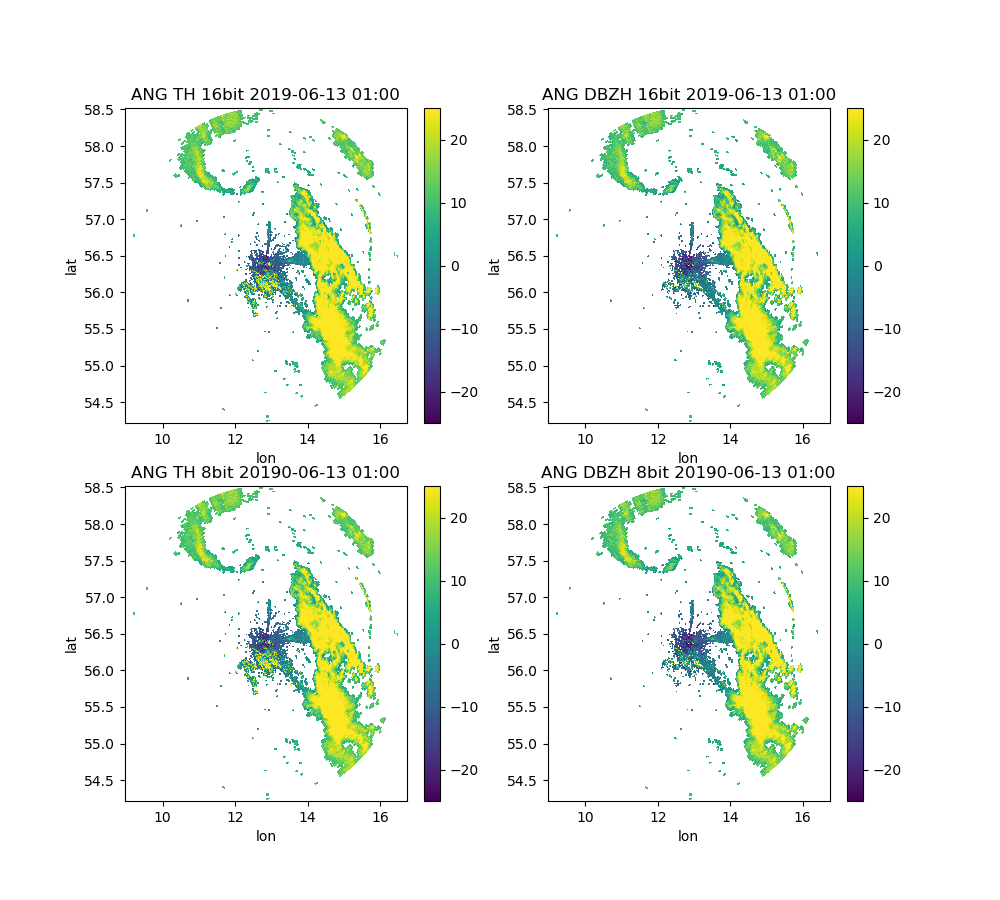

Text(0.5, 1.0, 'ANG DBZH 8bit 20190-06-13 01:00')

In [11]:
#TH vs DBZH
lat1_16_0= rad1_ang_16_05el.gate_latitude['data']
lon1_16_0= rad1_ang_16_05el.gate_longitude['data']
TH_16_0= rad1_ang_16_05el.fields['TH']['data']
DBZH_16_0= rad1_ang_16_05el.fields['DBZH']['data']

lat1_8_0= rad1_ang_8_05el.gate_latitude['data']
lon1_8_0= rad1_ang_8_05el.gate_longitude['data']
TH_8_0= rad1_ang_8_05el.fields['TH']['data']
DBZH_8_0= rad1_ang_8_05el.fields['DBZH']['data']


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.pcolormesh(lon1_16_0, lat1_16_0, TH_16_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG TH 16bit 2019-06-13 01:00')

plt.subplot(222)
plt.pcolormesh(lon1_16_0, lat1_16_0, DBZH_16_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG DBZH 16bit 2019-06-13 01:00')

plt.subplot(223)
plt.pcolormesh(lon1_8_0, lat1_8_0, TH_8_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG TH 8bit 20190-06-13 01:00')

plt.subplot(224)
plt.pcolormesh(lon1_8_0, lat1_8_0, DBZH_8_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG DBZH 8bit 20190-06-13 01:00')


In [12]:
print(np.shape(TH_16_0))
DBZH1=rad2_ang_16.fields['DBZH']['data']
print(np.shape(DBZH1))
1800/360

#why I can read only 5 sweeps when there are 10 elevations?

(360, 480)
(1800, 480)


5.0

In [26]:
#UVRADH and VRADH, elevation 0.5
UVRADH_16_0= rad1_ang_16_05el.fields['UVRADH']['data']
VRADH_16_0= rad1_ang_16_05el.fields['VRADH']['data']
UVRADH_8_0= rad1_ang_8_05el.fields['UVRADH']['data']
VRADH_8_0= rad1_ang_8_05el.fields['VRADH']['data']

mask1=VRADH_16_0.mask
mask2=VRADH_8_0.mask

#mask UVRADH 
UVRADH_16_0_m= rad1_ang_16_05el.fields['UVRADH']['data']
UVRADH_8_0_m= rad1_ang_8_05el.fields['UVRADH']['data']

UVRADH_16_0_m[mask1] = np.nan
UVRADH_8_0_m[mask2] = np.nan

<IPython.core.display.Javascript object>


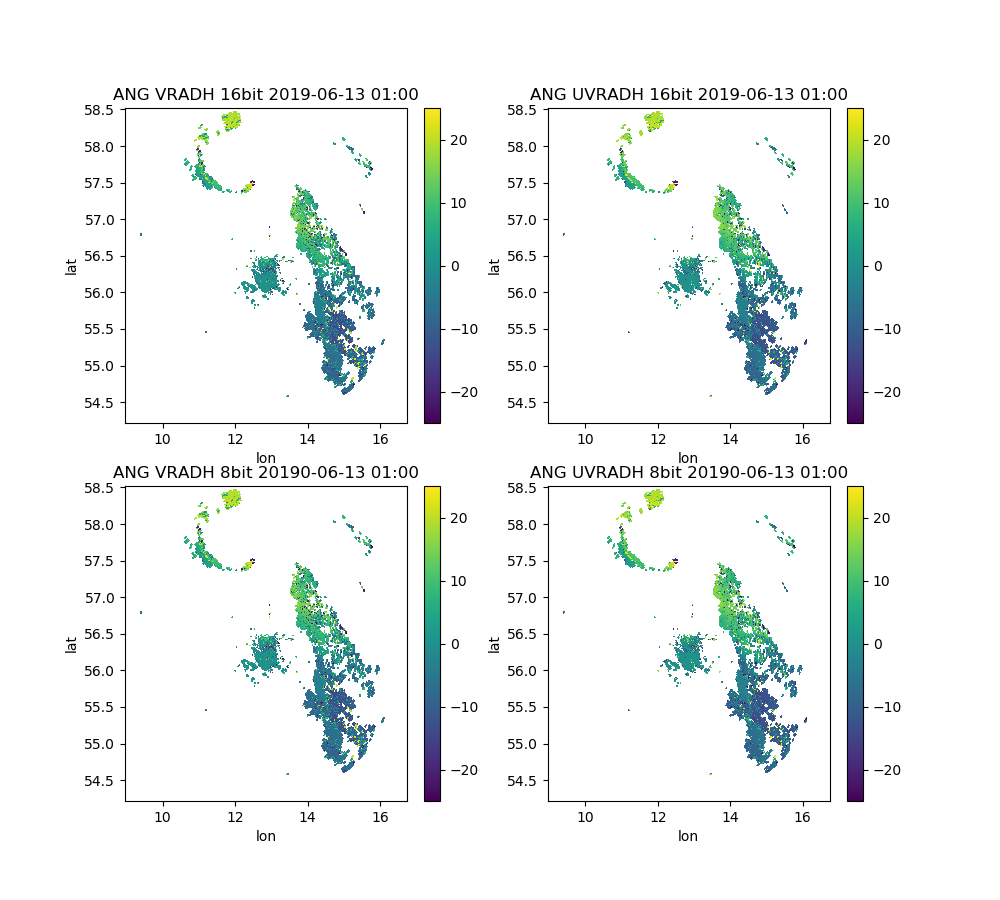

Text(0.5, 1.0, 'ANG UVRADH 8bit 20190-06-13 01:00')

In [20]:
%matplotlib notebook

plt.figure(figsize=(10,9))

plt.subplot(221)
plt.pcolormesh(lon1_16_0, lat1_16_0, VRADH_16_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG VRADH 16bit 2019-06-13 01:00')

plt.subplot(222)
plt.pcolormesh(lon1_16_0, lat1_16_0, UVRADH_16_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UVRADH 16bit 2019-06-13 01:00')

plt.subplot(223)
plt.pcolormesh(lon1_8_0, lat1_8_0, VRADH_8_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG VRADH 8bit 20190-06-13 01:00')

plt.subplot(224)
plt.pcolormesh(lon1_8_0, lat1_8_0, UVRADH_8_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UVRADH 8bit 20190-06-13 01:00')

<IPython.core.display.Javascript object>


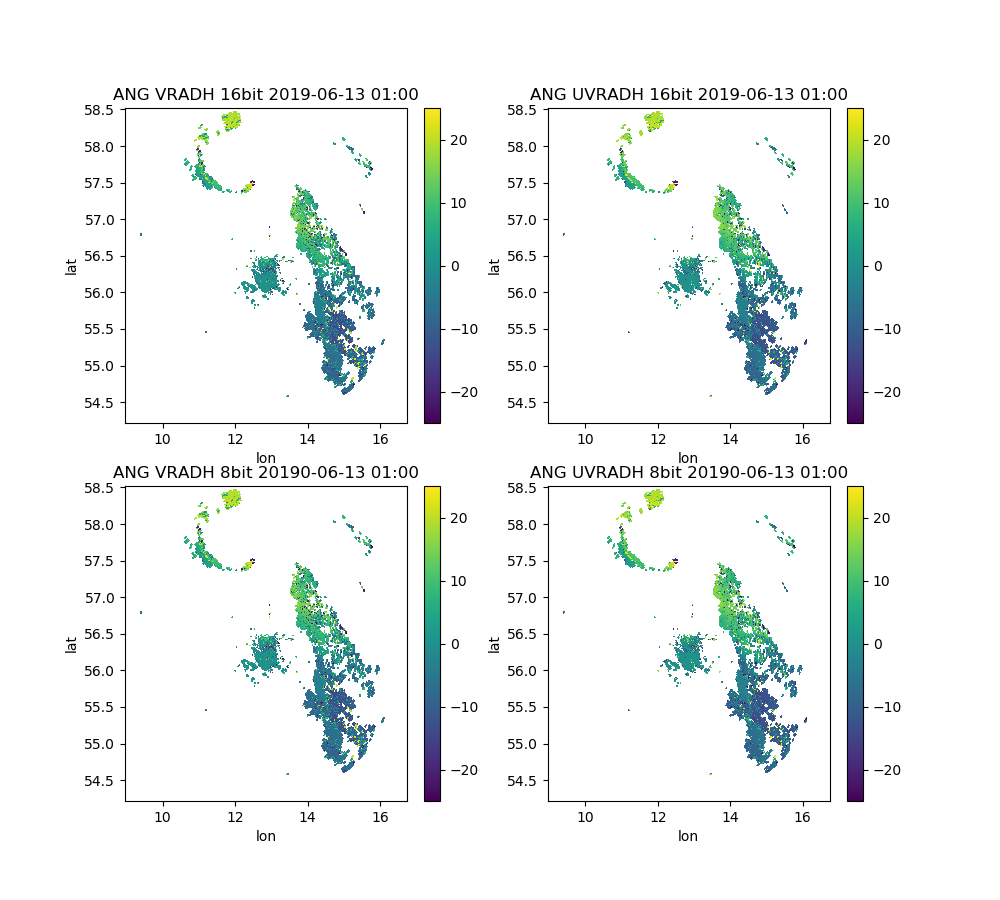

Text(0.5, 1.0, 'ANG UVRADH 8bit 20190-06-13 01:00')

In [27]:
%matplotlib notebook

plt.figure(figsize=(10,9))

plt.subplot(221)
plt.pcolormesh(lon1_16_0, lat1_16_0, VRADH_16_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG VRADH 16bit 2019-06-13 01:00')

plt.subplot(222)
plt.pcolormesh(lon1_16_0, lat1_16_0, UVRADH_16_0_m, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UVRADH 16bit 2019-06-13 01:00')

plt.subplot(223)
plt.pcolormesh(lon1_8_0, lat1_8_0, VRADH_8_0, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG VRADH 8bit 20190-06-13 01:00')

plt.subplot(224)
plt.pcolormesh(lon1_8_0, lat1_8_0, UVRADH_8_0_m, vmin=-25, vmax=25)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UVRADH 8bit 20190-06-13 01:00')


<IPython.core.display.Javascript object>


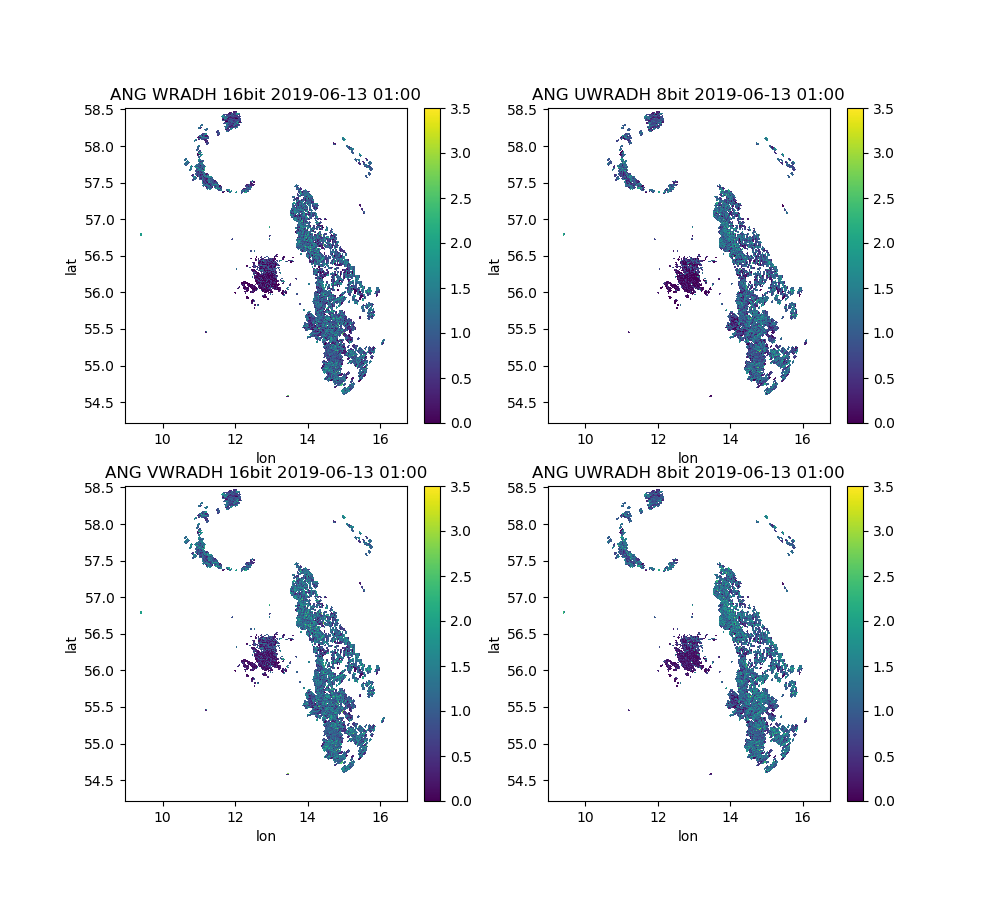

Text(0.5, 1.0, 'ANG UWRADH 8bit 2019-06-13 01:00')

In [23]:
#WRAD
UWRADH_16_0= rad1_ang_16_05el.fields['UWRADH']['data']
WRADH_16_0= rad1_ang_16_05el.fields['WRADH']['data']
UWRADH_8_0= rad1_ang_8_05el.fields['UWRADH']['data']
WRADH_8_0= rad1_ang_8_05el.fields['WRADH']['data']

mask1=WRADH_16_0.mask
UWRADH_16_0_m=UWRADH_16_0
UWRADH_16_0_m[mask1] = np.nan

mask2=WRADH_8_0.mask
UWRADH_8_0_m=UWRADH_8_0
UWRADH_8_0_m[mask2] = np.nan


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.pcolormesh(lon1_16_0, lat1_16_0, WRADH_16_0, vmin=0, vmax=3.5)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG WRADH 16bit 2019-06-13 01:00')

plt.subplot(222)
plt.pcolormesh(lon1_16_0, lat1_16_0, UWRADH_16_0_m, vmin=0, vmax=3.5)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UWRADH 8bit 2019-06-13 01:00')

plt.subplot(223)
plt.pcolormesh(lon1_8_0, lat1_8_0, WRADH_8_0, vmin=0, vmax=3.5)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG VWRADH 16bit 2019-06-13 01:00')

plt.subplot(224)
plt.pcolormesh(lon1_8_0, lat1_8_0, UWRADH_8_0_m, vmin=0, vmax=3.5)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG UWRADH 8bit 2019-06-13 01:00')


<IPython.core.display.Javascript object>


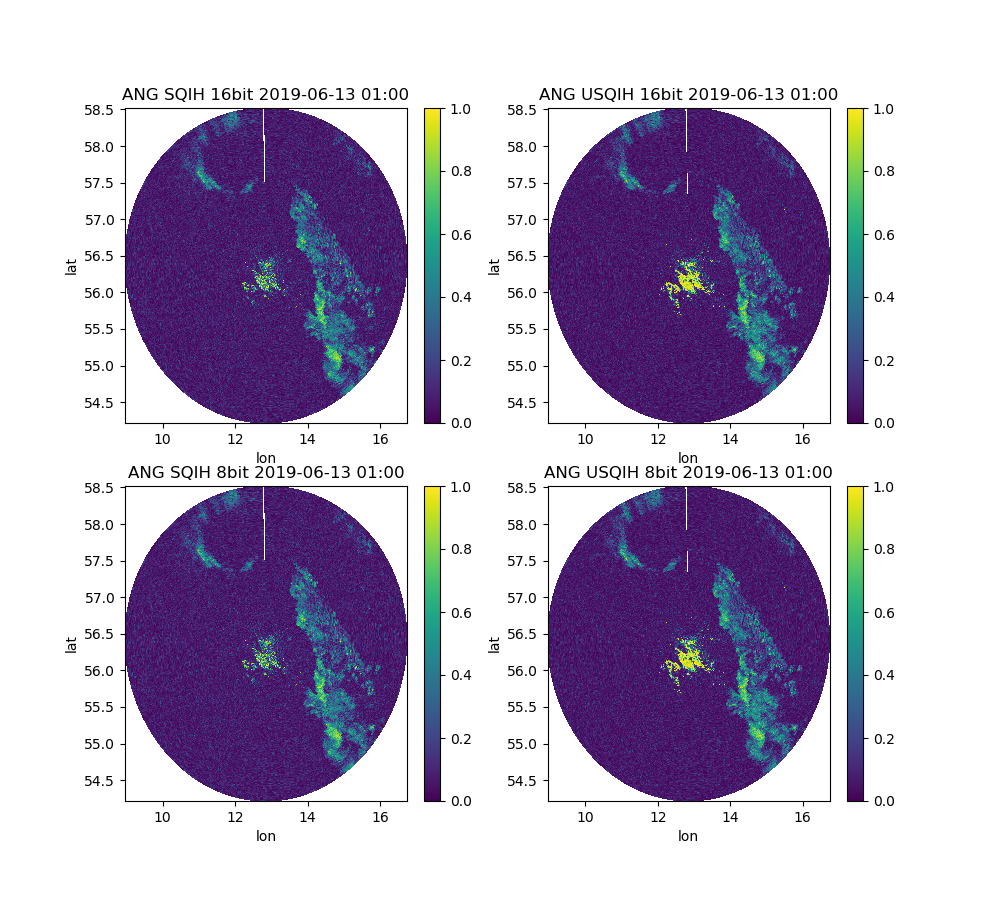

Text(0.5, 1.0, 'ANG USQIH 8bit 2019-06-13 01:00')

In [24]:
#SQIH
USQIH_16_0= rad1_ang_16_05el.fields['USQIH']['data']
SQIH_16_0= rad1_ang_16_05el.fields['SQIH']['data']
USQIH_8_0= rad1_ang_8_05el.fields['USQIH']['data']
SQIH_8_0= rad1_ang_8_05el.fields['SQIH']['data']


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.pcolormesh(lon1_16_0, lat1_16_0, SQIH_16_0, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG SQIH 16bit 2019-06-13 01:00')

plt.subplot(222)
plt.pcolormesh(lon1_16_0, lat1_16_0, USQIH_16_0, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG USQIH 16bit 2019-06-13 01:00')

plt.subplot(223)
plt.pcolormesh(lon1_8_0, lat1_8_0, SQIH_8_0, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG SQIH 8bit 2019-06-13 01:00')

plt.subplot(224)
plt.pcolormesh(lon1_8_0, lat1_8_0, USQIH_8_0, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('ANG USQIH 8bit 2019-06-13 01:00')


<IPython.core.display.Javascript object>


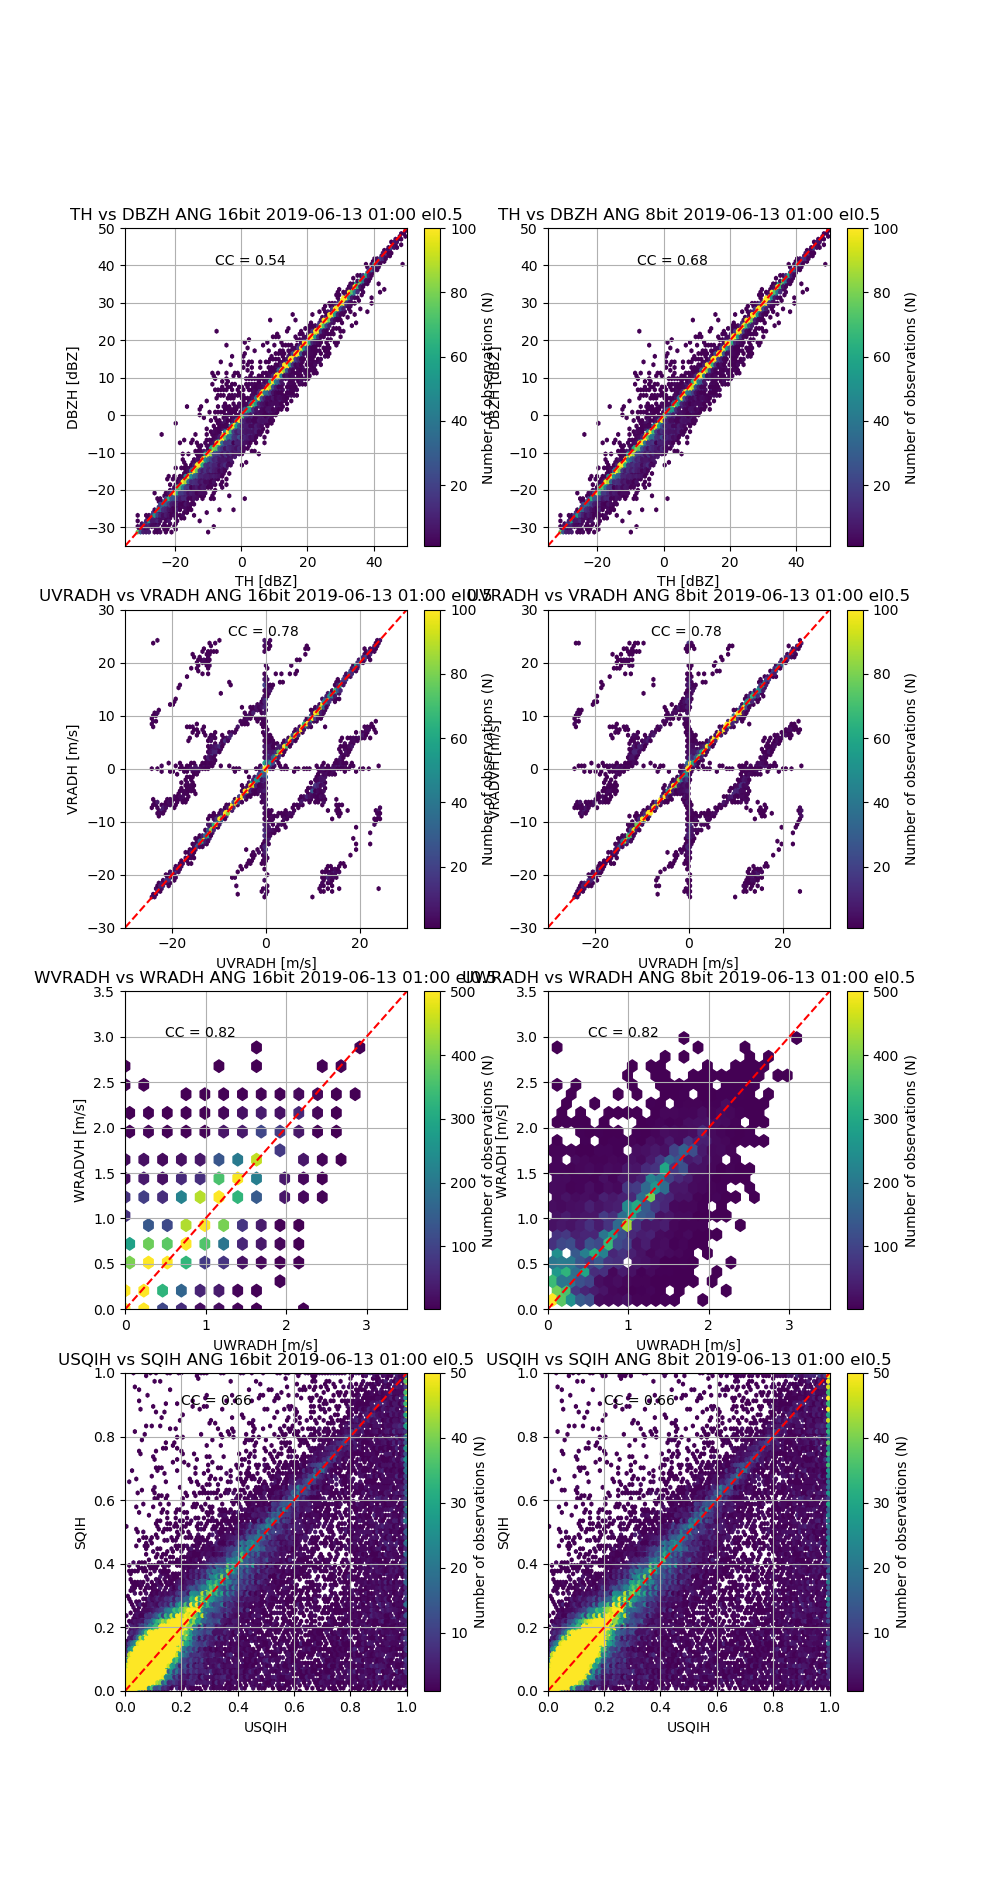

In [30]:
%matplotlib notebook

plt.figure(figsize=(10,19))

plt.subplot(4,2,1)
plt.hexbin(TH_16_0.flatten(),DBZH_16_0.flatten(), mincnt=0.1,gridsize=100,extent=(-35,50,-35,50),vmax=100)
cc=np.corrcoef(TH_16_0,DBZH_16_0)[0, 1]
plt.grid()
plt.plot([-35,50],[-35,50],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'TH [dBZ]')
plt.ylabel(u'DBZH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-8,40))
plt.title(u'TH vs DBZH ANG 16bit 2019-06-13 01:00 el0.5')

plt.subplot(4,2,2)
plt.hexbin(TH_8_0.flatten(),DBZH_8_0.flatten(), mincnt=0.1,gridsize=100,extent=(-35,50,-35,50),vmax=100)
cc=np.corrcoef(TH_8_0,DBZH_8_0)[0, 1]
plt.grid()
plt.plot([-35,50],[-35,50],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'TH [dBZ]')
plt.ylabel(u'DBZH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-8,40))
plt.title(u'TH vs DBZH ANG 8bit 2019-06-13 01:00 el0.5')


plt.subplot(4,2,3)
plt.hexbin(UVRADH_16_0_m.flatten(),VRADH_16_0.flatten(), mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH ANG 16bit 2019-06-13 01:00 el0.5')
a=UVRADH_16_0_m.flatten()
b=VRADH_16_0.flatten()
bad = ~np.logical_or(np.isnan(a), np.isnan(b))
a= a[bad]
b= b[bad]
cc=np.corrcoef(a,b)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-8,25))

plt.subplot(4,2,4)
plt.hexbin(UVRADH_8_0_m.flatten(),VRADH_8_0.flatten(), mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADVH [m/s]')
plt.title(u'UVRADH vs VRADH ANG 8bit 2019-06-13 01:00 el0.5')
a=UVRADH_8_0_m.flatten()
b=VRADH_8_0.flatten()
bad = ~np.logical_or(np.isnan(a), np.isnan(b))
a= a[bad]
b= b[bad]
cc=np.corrcoef(a,b)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-8,25))

plt.subplot(4,2,5)
plt.hexbin(UWRADH_16_0_m.flatten(),WRADH_16_0.flatten(), mincnt=0.1,gridsize=30,extent=(0,3.5,0,3.5),vmax=500)
plt.grid()
plt.plot([0,3.5],[0,3.5],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UWRADH [m/s]')
plt.ylabel(u'WRADVH [m/s]')
plt.title(u'WVRADH vs WRADH ANG 16bit 2019-06-13 01:00 el0.5')
a=UWRADH_16_0_m.flatten()
b=WRADH_16_0.flatten()
bad = ~np.logical_or(np.isnan(a), np.isnan(b))
a= a[bad]
b= b[bad]
cc=np.corrcoef(a,b)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(0.5,3))

plt.subplot(4,2,6)
plt.hexbin(UWRADH_8_0_m.flatten(),WRADH_8_0.flatten(), mincnt=0.1,gridsize=30,extent=(0,3.5,0,3.5),vmax=500)
plt.grid()
plt.plot([0,3.5],[0,3.5],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UWRADH [m/s]')
plt.ylabel(u'WRADH [m/s]')
plt.title(u'UWRADH vs WRADH ANG 8bit 2019-06-13 01:00 el0.5')
a=UWRADH_8_0_m.flatten()
b=WRADH_8_0.flatten()
bad = ~np.logical_or(np.isnan(a), np.isnan(b))
a= a[bad]
b= b[bad]
cc=np.corrcoef(a,b)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(0.5,3))

plt.subplot(4,2,7)
plt.hexbin(USQIH_16_0.flatten(),SQIH_16_0.flatten(), mincnt=0.1,gridsize=100,extent=(0,1,0,1),vmax=50)
cc=np.corrcoef(USQIH_16_0,SQIH_16_0)[0, 1]
plt.grid()
plt.plot([0,1],[0,1],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'USQIH')
plt.ylabel(u'SQIH')
plt.annotate('CC = {:.2}'.format(cc),(0.2,0.9))
plt.title(u'USQIH vs SQIH ANG 16bit 2019-06-13 01:00 el0.5')

plt.subplot(4,2,8)
plt.hexbin(USQIH_8_0.flatten(),SQIH_8_0.flatten(), mincnt=0.1,gridsize=100,extent=(0,1,0,1),vmax=50)
cc=np.corrcoef(USQIH_8_0,SQIH_8_0)[0, 1]
plt.grid()
plt.plot([0,1],[0,1],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'USQIH')
plt.ylabel(u'SQIH')
plt.annotate('CC = {:.2}'.format(cc),(0.2,0.9))
plt.title(u'USQIH vs SQIH ANG 8bit 2019-06-13 01:00 el0.5')
#plt.savefig('2018_0712_arl_radvh_scatter_aux.png')
plt.show()


<IPython.core.display.Javascript object>


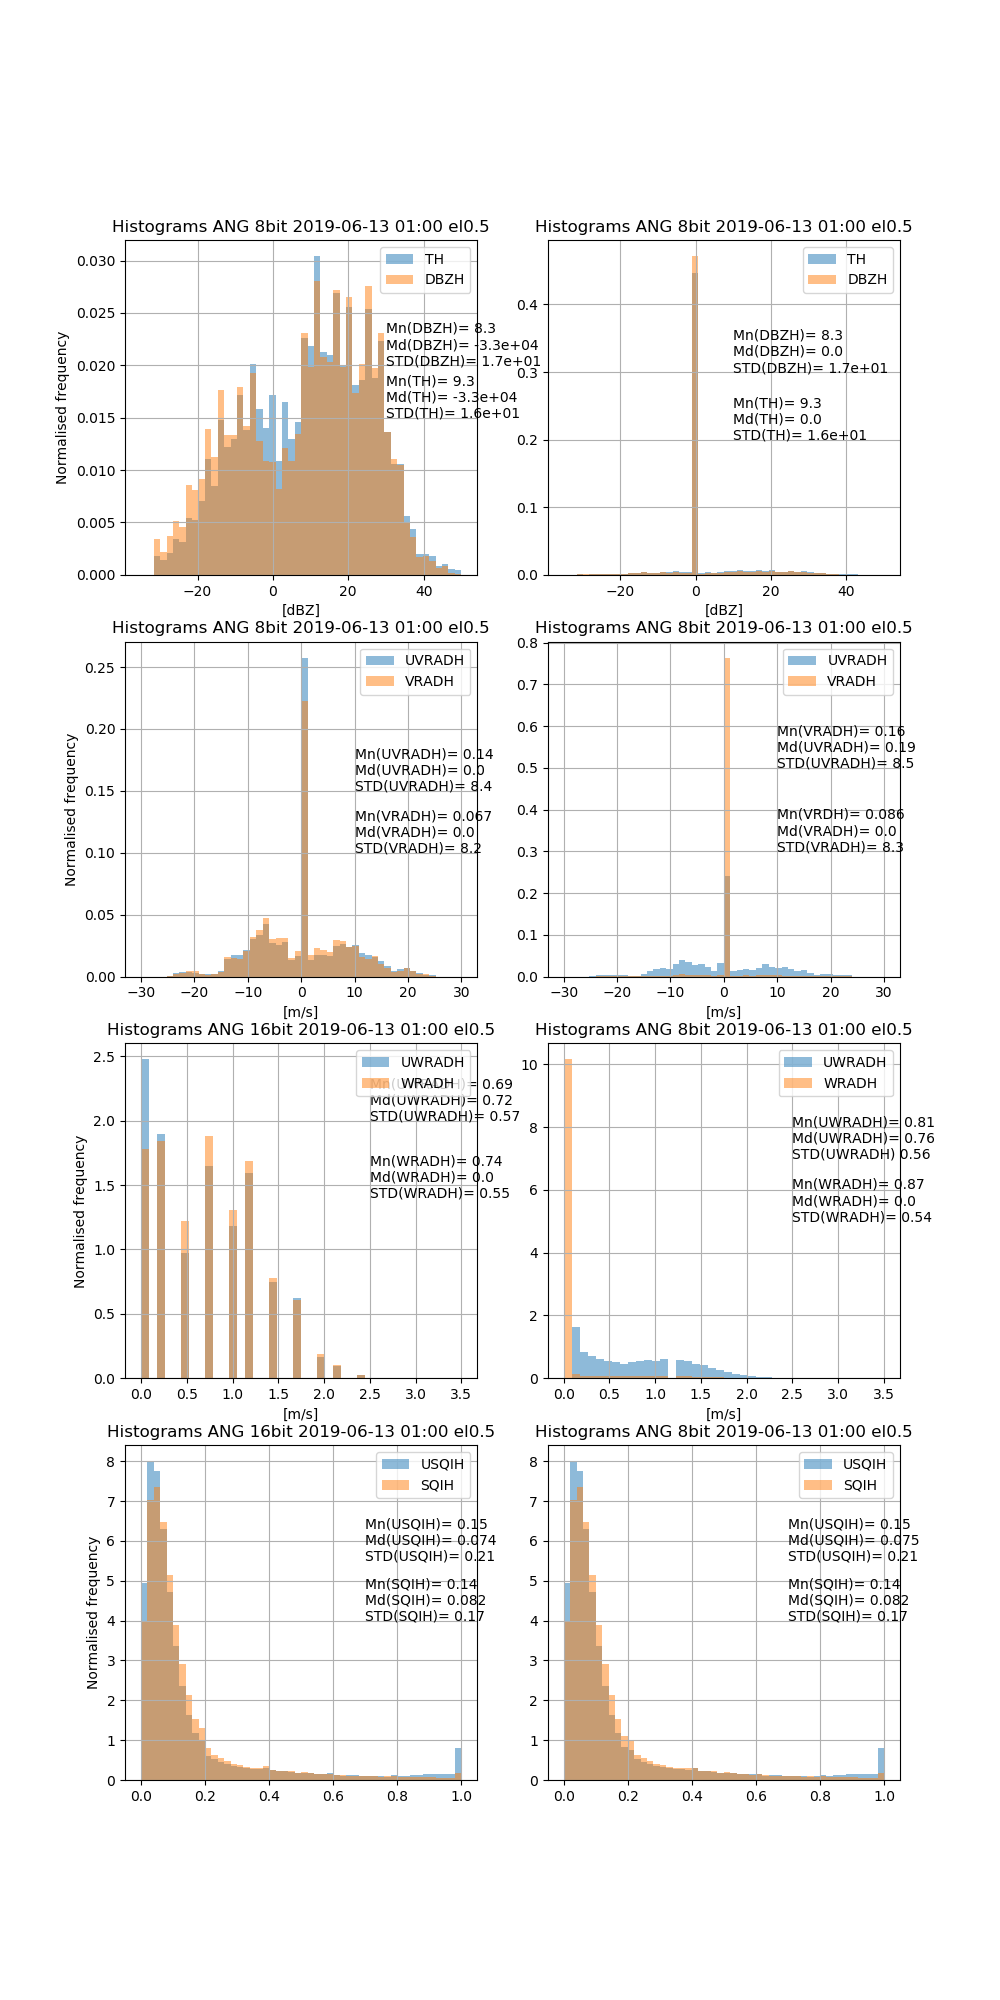

In [32]:
plt.figure(figsize=(10,20))

plt.subplot(4,2,1)
plt.hist(TH_16_0.flatten(), bins=50, alpha=0.5, range=(-35,50),normed=True)
plt.hist(DBZH_16_0.flatten(), bins=50, alpha=0.5, range=(-35,50),normed=True)
plt.grid()
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=DBZH_16_0.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (30,0.02))
V=TH_16_0.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (30,0.015))
plt.legend(['TH','DBZH'],loc='best')


plt.subplot(4,2,2)
plt.hist(TH_8_0.flatten(),bins=50, alpha=0.5, range=(-35,50),normed=True)
plt.hist(DBZH_8_0.flatten(),bins=50, alpha=0.5,range=(-35,50),normed=True)
plt.grid()
plt.xlabel('[dBZ]')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=DBZH_8_0.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (10,0.3))
V=TH_8_0.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (10,0.2))
plt.legend(['TH','DBZH'],loc='best')


plt.subplot(4,2,3)
plt.hist(UVRADH_16_0_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(VRADH_16_0.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.grid()
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=UVRADH_16_0_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (10,0.15))
V=VRADH_16_0.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (10,0.10))
plt.legend(['UVRADH','VRADH'],loc='best')



plt.subplot(4,2,4)
plt.hist(UVRADH_8_0_m.flatten(),bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(VRADH_8_0.flatten(),bins=50, alpha=0.5,range=(-30,30),normed=True)
plt.grid()
#plt.xlabel('Reflectivity difference (dB)')
#plt.ylabel('Normalised frequency')
plt.xlabel('[m/s]')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=UVRADH_8_0_m.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (10,0.5))
V=VRADH_8_0.flatten()
plt.annotate('Mn(VRDH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (10,0.3))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(4,2,5)
plt.hist(UWRADH_16_0_m.flatten(),bins=40, alpha=0.5,range=(0,3.5), normed=True)
plt.hist(WRADH_16_0.flatten(),bins=40, alpha=0.5,range=(0,3.5), normed=True)
plt.grid()
#plt.xlabel('Reflectivity difference (dB)')
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms ANG 16bit 2019-06-13 01:00 el0.5')
UV=UWRADH_16_0_m.flatten()
plt.annotate('Mn(UWRADH)= {:.2}\nMd(UWRADH)= {:.2}\nSTD(UWRADH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (2.5,2))
V=WRADH_16_0.flatten()
plt.annotate('Mn(WRADH)= {:.2}\nMd(WRADH)= {:.2}\nSTD(WRADH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (2.5,1.4))
plt.legend(['UWRADH','WRADH'],loc='best')

plt.subplot(4,2,6)
plt.hist(UWRADH_8_0_m.flatten(),bins=40, alpha=0.5, range=(0,3.5), normed=True)
plt.hist(WRADH_8_0.flatten(),bins=40, alpha=0.5, range=(0,3.5), normed=True)
plt.grid()
#plt.xlabel('Reflectivity difference (dB)')
#plt.ylabel('Normalised frequency')
plt.xlabel('[m/s]')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=UWRADH_8_0_m.flatten()
plt.annotate('Mn(UWRADH)= {:.2}\nMd(UWRADH)= {:.2}\nSTD(UWRADH) {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (2.5,7))
V=WRADH_8_0.flatten()
plt.annotate('Mn(WRADH)= {:.2}\nMd(WRADH)= {:.2}\nSTD(WRADH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (2.5,5))
plt.legend(['UWRADH','WRADH'],loc='best')


plt.subplot(4,2,7)
plt.hist(USQIH_16_0.flatten(),bins=50, alpha=0.5,range=(0,1),normed=True)
plt.hist(SQIH_16_0.flatten(),bins=50, alpha=0.5,range=(0,1),normed=True)
plt.grid()
#plt.xlabel('Reflectivity difference (dB)')
plt.ylabel('Normalised frequency')
plt.title('Histograms ANG 16bit 2019-06-13 01:00 el0.5')
UV=USQIH_16_0.flatten()
plt.annotate('Mn(USQIH)= {:.2}\nMd(USQIH)= {:.2}\nSTD(USQIH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (0.7,5.5))
V=SQIH_16_0.flatten()
plt.annotate('Mn(SQIH)= {:.2}\nMd(SQIH)= {:.2}\nSTD(SQIH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (0.7,4))
plt.legend(['USQIH','SQIH'],loc='best')


plt.subplot(4,2,8)
plt.hist(USQIH_8_0.flatten(),bins=50, alpha=0.5,range=(0,1),normed=True)
plt.hist(SQIH_8_0.flatten(),bins=50, alpha=0.5, range=(0,1),normed=True)
plt.grid()
#plt.xlabel('Reflectivity difference (dB)')
#plt.ylabel('Normalised frequency')
plt.title('Histograms ANG 8bit 2019-06-13 01:00 el0.5')
UV=USQIH_8_0.flatten()
plt.annotate('Mn(USQIH)= {:.2}\nMd(USQIH)= {:.2}\nSTD(USQIH)= {:.2}'.format(np.nanmean(UV),
                                                                        np.nanmedian(UV),
                                                                        np.nanstd(UV)), (0.7,5.5))
V=SQIH_8_0.flatten()
plt.annotate('Mn(SQIH)= {:.2}\nMd(SQIH)= {:.2}\nSTD(SQIH)= {:.2}'.format(np.nanmean(V),
                                                                        np.nanmedian(V),
                                                                        np.nanstd(V)), (0.7,4))
plt.legend(['USQIH','SQIH'],loc='best')


### Bålsta and Hemse

In [33]:
rad1_baa_16= pyart.aux_io.odim_h5.read_odim_h5_split(file1_baa_16bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])


rad1_hem_16= pyart.aux_io.odim_h5.read_odim_h5_split(file1_hem_16bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_hem_16= pyart.aux_io.odim_h5.read_odim_h5_split(file2_hem_16bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

rad1_hem_8= pyart.aux_io.odim_h5.read_odim_h5_split(file1_hem_8bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_hem_8= pyart.aux_io.odim_h5.read_odim_h5_split(file2_hem_8bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

yes


In [34]:
### this is to extract the 0.5 sweep
# radar BAA and HEM
rad1_baa_16_05el= rad1_baa_16.extract_sweeps([0])

rad1_hem_16_05el= rad1_hem_16.extract_sweeps([0])
rad1_hem_8_05el= rad1_hem_8.extract_sweeps([0]) 

In [35]:
DBZH=rad1_baa_16_05el.fields['DBZH']['data']
print(np.shape(DBZH))
TH= rad1_baa_16_05el.fields['TH']['data']
print(np.shape(TH))

(360, 480)
(360, 480)


<IPython.core.display.Javascript object>


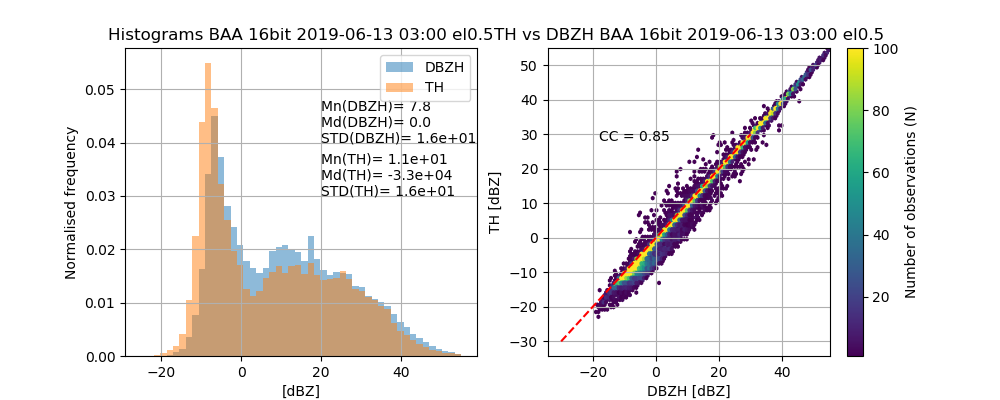

Text(0.5, 1.0, 'TH vs DBZH BAA 16bit 2019-06-13 03:00 el0.5')

In [37]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(TH.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.hist(DBZH.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms BAA 16bit 2019-06-13 03:00 el0.5')
plt.grid()
UVf=DBZH.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (20,0.04))
Vf=TH.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (20,0.03))
plt.legend(['DBZH','TH'],loc='best')


plt.subplot(122)
plt.hexbin(TH.flatten(),DBZH.flatten(), mincnt=0.1,gridsize=100,extent=(-25,55,-25,55),vmax=100)
cc=np.corrcoef(DBZH,TH)[0, 1]
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'DBZH [dBZ]')
plt.ylabel(u'TH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
plt.title(u'TH vs DBZH BAA 16bit 2019-06-13 03:00 el0.5')


<IPython.core.display.Javascript object>


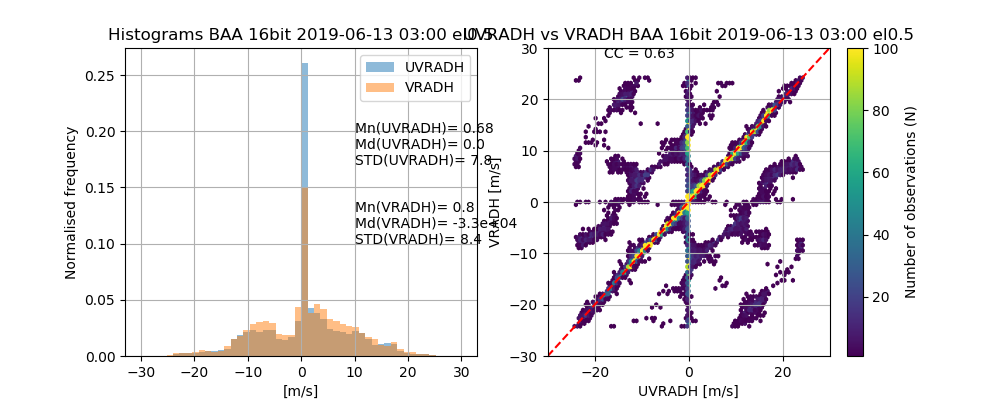

Text(-18, 28, 'CC = 0.63')

In [38]:
UV=rad1_baa_16_05el.fields['UVRADH']['data']
V=rad1_baa_16_05el.fields['VRADH']['data']

mask=V.mask
UV_m=UV
UV_m[mask]= np.nan

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(UV_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(V.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms BAA 16bit 2019-06-13 03:00 el0.5')
plt.grid()
UVf=UV_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (10,0.17))
Vf=V.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (10,0.10))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(122)
plt.hexbin(UVf, Vf, mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH BAA 16bit 2019-06-13 03:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-18,28))


<IPython.core.display.Javascript object>


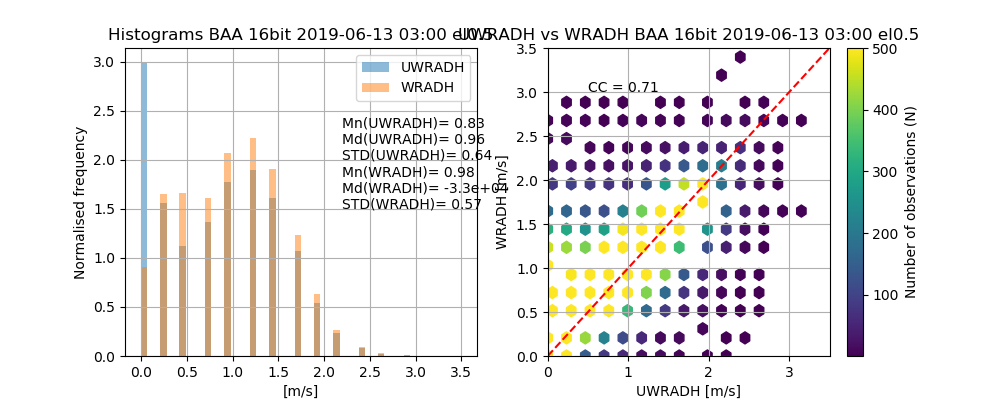

Text(0.5, 3, 'CC = 0.71')

In [39]:
UV=rad1_baa_16_05el.fields['UWRADH']['data']
V=rad1_baa_16_05el.fields['WRADH']['data']

mask2=V.mask
UV_m=UV
UV_m[mask2] = np.nan

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(UV.flatten(), bins=50, alpha=0.5, range=(0,3.5),normed=True)
plt.hist(V.flatten(), bins=50, alpha=0.5, range=(0,3.5),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms BAA 16bit 2019-06-13 03:00 el0.5')
plt.grid()
UVf=UV.flatten()
plt.annotate('Mn(UWRADH)= {:.2}\nMd(UWRADH)= {:.2}\nSTD(UWRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (2.2,2))
Vf=V.flatten()
plt.annotate('Mn(WRADH)= {:.2}\nMd(WRADH)= {:.2}\nSTD(WRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (2.2,1.5))
plt.legend(['UWRADH','WRADH'],loc='best')


plt.subplot(122)
plt.hexbin(UV.flatten(),V.flatten(), mincnt=0.1,gridsize=30,extent=(0,3.5,0,3.5),vmax=500)
plt.grid()
plt.plot([0,3.5],[0,3.5],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UWRADH [m/s]')
plt.ylabel(u'WRADH [m/s]')
plt.title(u'UWRADH vs WRADH BAA 16bit 2019-06-13 03:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(0.5,3))

<IPython.core.display.Javascript object>


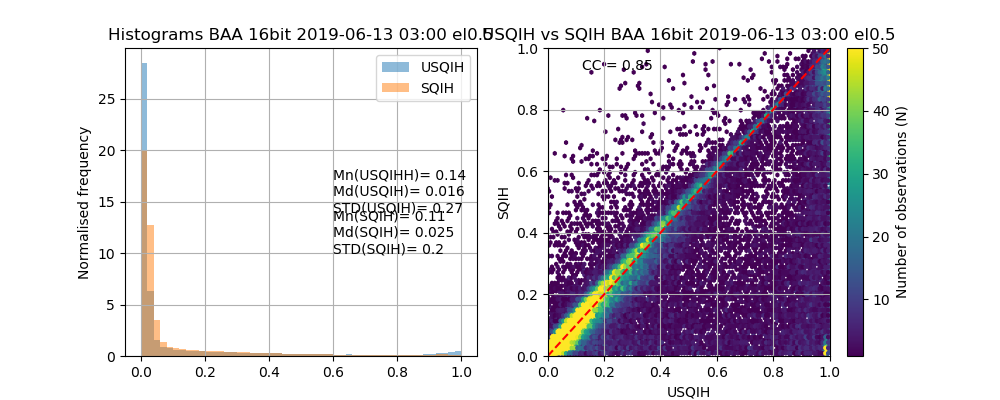

Text(0.12, 0.93, 'CC = 0.85')

In [40]:
UV=rad1_baa_16_05el.fields['USQIH']['data']
V=rad1_baa_16_05el.fields['SQIH']['data']

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(UV.flatten(), bins=50, alpha=0.5, range=(0,1),normed=True)
plt.hist(V.flatten(), bins=50, alpha=0.5, range=(0,1),normed=True)
#plt.xlabel('')
plt.ylabel('Normalised frequency')
plt.title('Histograms BAA 16bit 2019-06-13 03:00 el0.5')
plt.grid()
UVf=UV.flatten()
plt.annotate('Mn(USQIHH)= {:.2}\nMd(USQIH)= {:.2}\nSTD(USQIH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (0.6,14))
Vf=V.flatten()
plt.annotate('Mn(SQIH)= {:.2}\nMd(SQIH)= {:.2}\nSTD(SQIH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (0.6,10))
plt.legend(['USQIH','SQIH'],loc='best')


plt.subplot(122)
plt.hexbin(UV.flatten(),V.flatten(), mincnt=0.1,gridsize=100,extent=(0,1,0,1),vmax=50)
plt.grid()
plt.plot([0,1],[0,1],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'USQIH')
plt.ylabel(u'SQIH')
plt.title(u'USQIH vs SQIH BAA 16bit 2019-06-13 03:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(0.12,0.93))

<IPython.core.display.Javascript object>


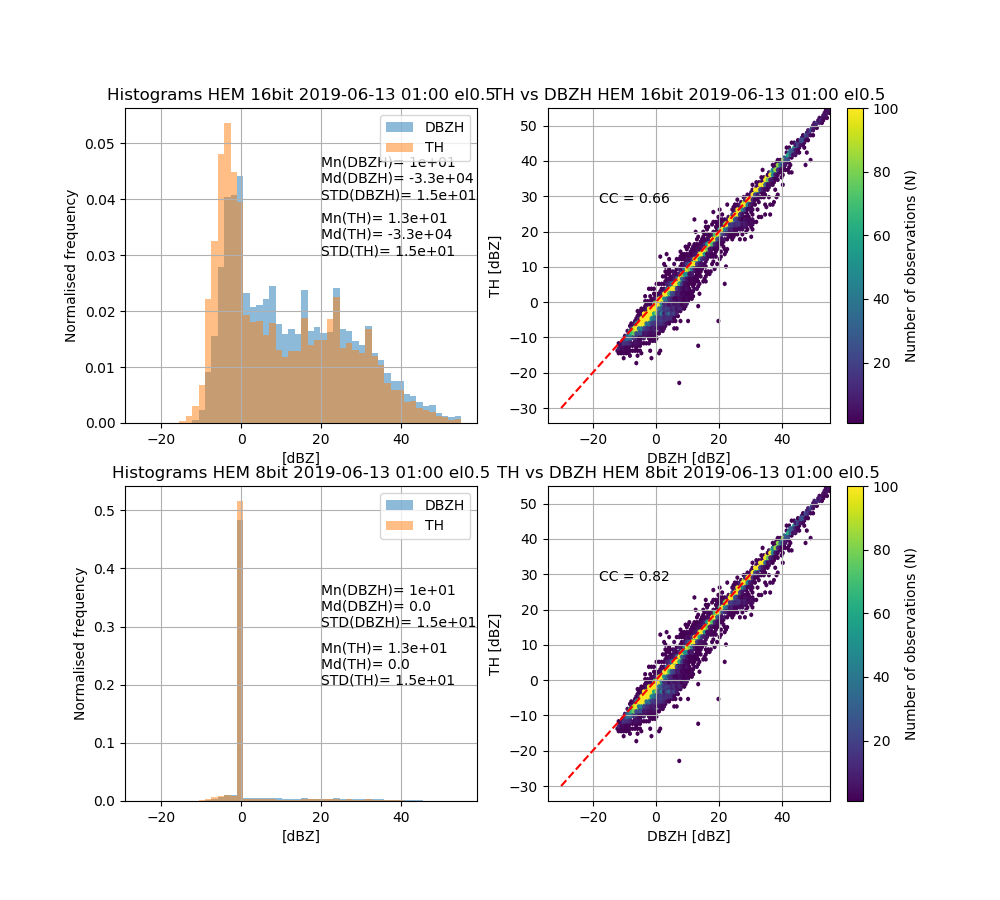

Text(0.5, 1.0, 'TH vs DBZH HEM 8bit 2019-06-13 01:00 el0.5')

In [42]:
#Hemse
DBZH_16=rad1_hem_16_05el.fields['DBZH']['data']
TH_16= rad1_hem_16_05el.fields['TH']['data']

DBZH_8=rad1_hem_8_05el.fields['DBZH']['data']
TH_8= rad1_hem_8_05el.fields['TH']['data']


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.hist(TH_16.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.hist(DBZH_16.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms HEM 16bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=DBZH_16.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (20,0.04))
Vf=TH_16.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (20,0.03))
plt.legend(['DBZH','TH'],loc='best')


plt.subplot(222)
plt.hexbin(TH_16.flatten(),DBZH_16.flatten(), mincnt=0.1,gridsize=100,extent=(-25,55,-25,55),vmax=100)
cc=np.corrcoef(DBZH_16,TH_16)[0, 1]
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'DBZH [dBZ]')
plt.ylabel(u'TH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
plt.title(u'TH vs DBZH HEM 16bit 2019-06-13 01:00 el0.5')


plt.subplot(223)
plt.hist(TH_8.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.hist(DBZH_8.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms HEM 8bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=DBZH_8.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (20,0.3))
Vf=TH_8.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (20,0.2))
plt.legend(['DBZH','TH'],loc='best')


plt.subplot(224)
plt.hexbin(TH_8.flatten(),DBZH_8.flatten(), mincnt=0.1,gridsize=100,extent=(-25,55,-25,55),vmax=100)
cc=np.corrcoef(DBZH_8,TH_8)[0, 1]
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'DBZH [dBZ]')
plt.ylabel(u'TH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
plt.title(u'TH vs DBZH HEM 8bit 2019-06-13 01:00 el0.5')

<IPython.core.display.Javascript object>


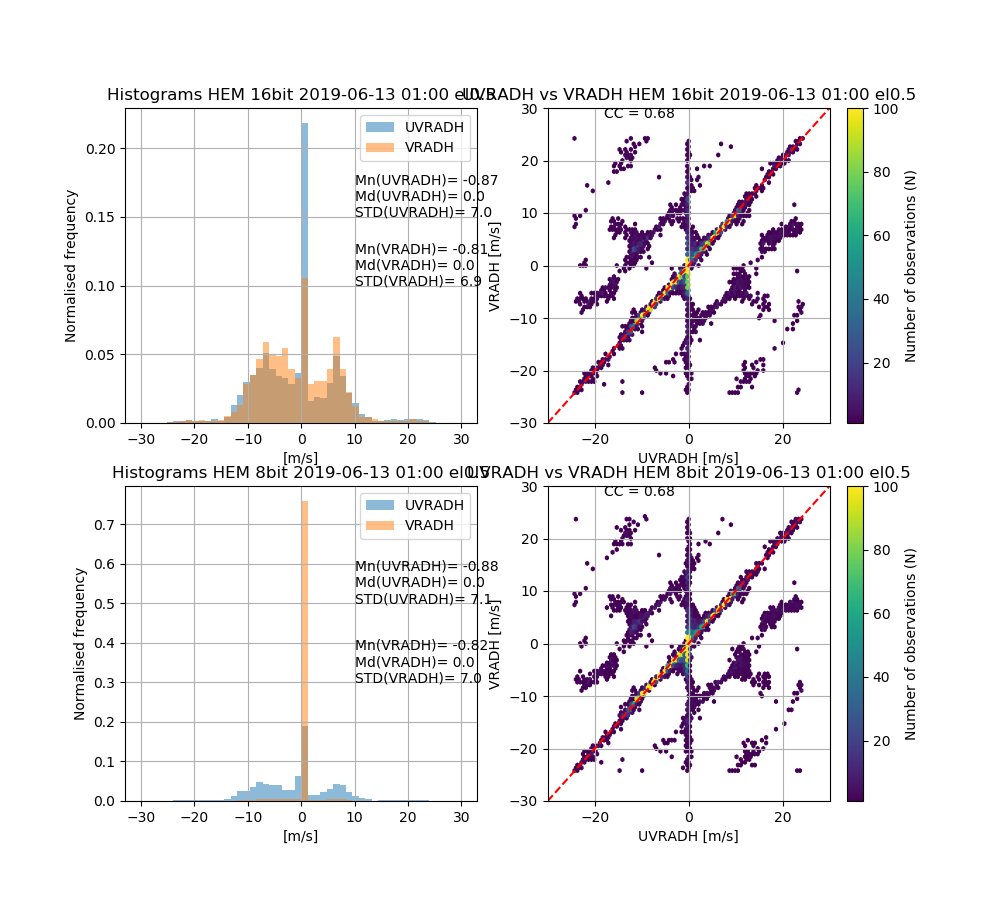

Text(-18, 28, 'CC = 0.68')

In [43]:
UV_16=rad1_hem_16_05el.fields['UVRADH']['data']
V_16=rad1_hem_16_05el.fields['VRADH']['data']

mask_16=V_16.mask
UV_16_m=UV_16
UV_16_m[mask_16]= np.nan


UV_8=rad1_hem_8_05el.fields['UVRADH']['data']
V_8=rad1_hem_8_05el.fields['VRADH']['data']

mask_8=V_8.mask
UV_8_m=UV_8
UV_8_m[mask_8]= np.nan


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.hist(UV_16_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(V_16.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms HEM 16bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=UV_16_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (10,0.15))
Vf=V_16.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (10,0.10))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(222)
plt.hexbin(UVf, Vf, mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH HEM 16bit 2019-06-13 01:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-18,28))

plt.subplot(223)
plt.hist(UV_8_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(V_8.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms HEM 8bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=UV_8_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (10,0.5))
Vf=V_8.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (10,0.3))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(224)
plt.hexbin(UVf, Vf, mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH HEM 8bit 2019-06-13 01:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-18,28))



### Karlskrona 

In [44]:
rad1_kaa_16= pyart.aux_io.odim_h5.read_odim_h5_split(file1_kaa_16bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_kaa_16= pyart.aux_io.odim_h5.read_odim_h5_split(file2_kaa_16bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

rad1_kaa_8= pyart.aux_io.odim_h5.read_odim_h5_split(file1_kaa_8bit, field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'DBZH', 'LDR', 'SQIH', 'SNRH', 'CCORH', 'VRADH', 'WRADH',
                                                                                   'USQIH', 'UVRADH', 'UWRADH', 'CI', 'CID', 'CPA', 'PSP'])

rad2_kaa_8= pyart.aux_io.odim_h5.read_odim_h5_split(file2_kaa_8bit, field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'],
                     file_field_names=['TH', 'TV', 'DBZH', 'DBZV', 'LDR', 'RHOHV', 'PHIDP', 'SQIH', 'SQIV',
                                                                                   'SNRH', 'SNRV','CCORH', 'CCORV', 'VRADH', 'VRADV', 'WRADH', 'WRADV', 
                                                                                   'UZDR', 'URHOHV', 'UPHIDP', 'USQIH', 'USQIV', 'UVRADH', 'UVRADV',
                                                                                   'UWRADH', 'UWRADV', 'CI', 'CID', 'CPA', 'PSP'])

In [45]:
rad1_kaa_16_05el= rad1_kaa_16.extract_sweeps([0])
rad1_kaa_8_05el= rad1_kaa_8.extract_sweeps([0]) 

<IPython.core.display.Javascript object>


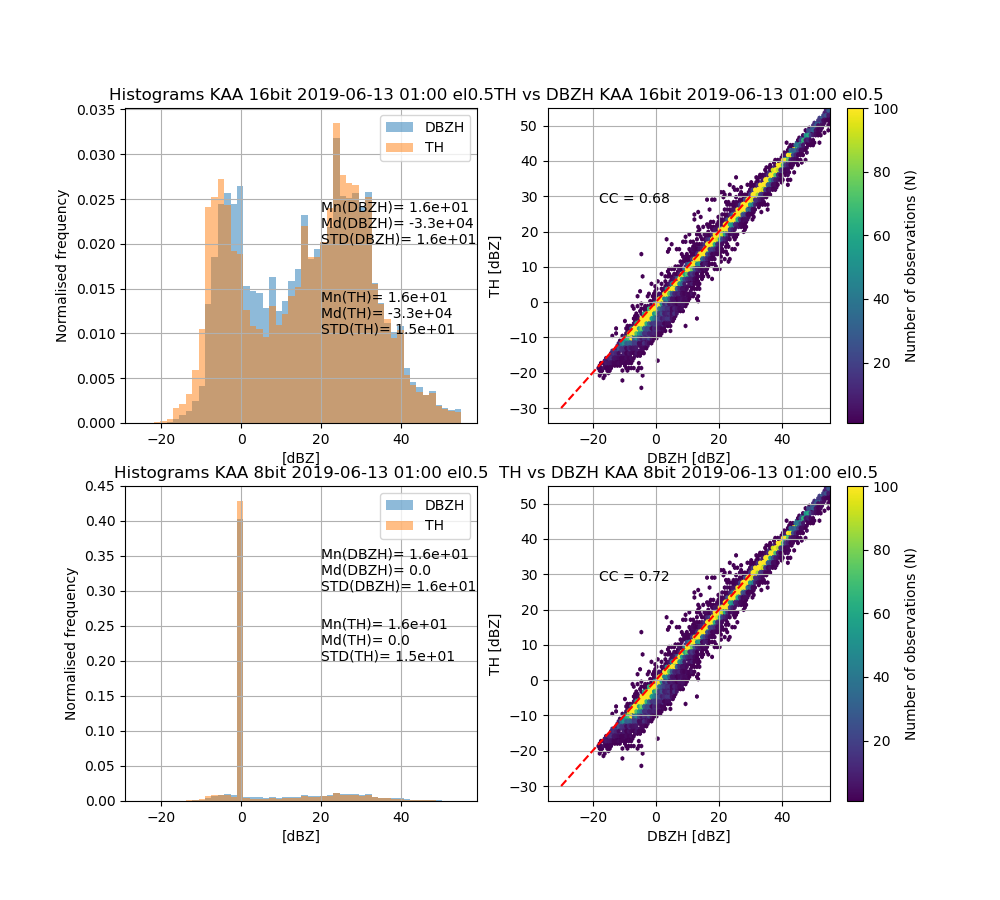

Text(0.5, 1.0, 'TH vs DBZH KAA 8bit 2019-06-13 01:00 el0.5')

In [46]:
DBZH_16=rad1_kaa_16_05el.fields['DBZH']['data']
TH_16= rad1_kaa_16_05el.fields['TH']['data']

DBZH_8=rad1_kaa_8_05el.fields['DBZH']['data']
TH_8= rad1_kaa_8_05el.fields['TH']['data']


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.hist(TH_16.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.hist(DBZH_16.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms KAA 16bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=DBZH_16.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (20,0.02))
Vf=TH_16.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (20,0.01))
plt.legend(['DBZH','TH'],loc='best')


plt.subplot(222)
plt.hexbin(TH_16.flatten(),DBZH_16.flatten(), mincnt=0.1,gridsize=100,extent=(-25,55,-25,55),vmax=100)
cc=np.corrcoef(DBZH_16,TH_16)[0, 1]
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'DBZH [dBZ]')
plt.ylabel(u'TH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
plt.title(u'TH vs DBZH KAA 16bit 2019-06-13 01:00 el0.5')


plt.subplot(223)
plt.hist(TH_8.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.hist(DBZH_8.flatten(), bins=50, alpha=0.5, range=(-25,55),normed=True)
plt.xlabel('[dBZ]')
plt.ylabel('Normalised frequency')
plt.title('Histograms KAA 8bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=DBZH_8.flatten()
plt.annotate('Mn(DBZH)= {:.2}\nMd(DBZH)= {:.2}\nSTD(DBZH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (20,0.3))
Vf=TH_8.flatten()
plt.annotate('Mn(TH)= {:.2}\nMd(TH)= {:.2}\nSTD(TH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (20,0.2))
plt.legend(['DBZH','TH'],loc='best')


plt.subplot(224)
plt.hexbin(TH_8.flatten(),DBZH_8.flatten(), mincnt=0.1,gridsize=100,extent=(-25,55,-25,55),vmax=100)
cc=np.corrcoef(DBZH_8,TH_8)[0, 1]
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'DBZH [dBZ]')
plt.ylabel(u'TH [dBZ]')
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
plt.title(u'TH vs DBZH KAA 8bit 2019-06-13 01:00 el0.5')

<IPython.core.display.Javascript object>


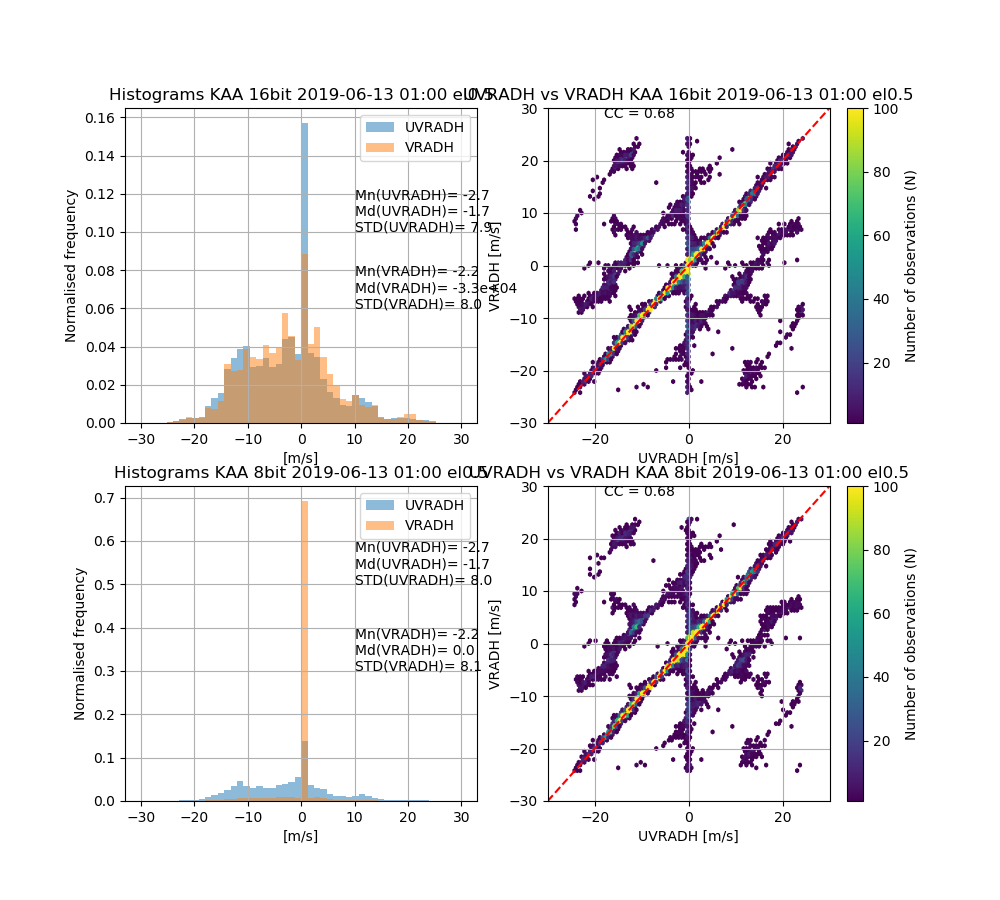

Text(-18, 28, 'CC = 0.68')

In [47]:
UV_16=rad1_kaa_16_05el.fields['UVRADH']['data']
V_16=rad1_kaa_16_05el.fields['VRADH']['data']

mask_16=V_16.mask
UV_16_m=UV_16
UV_16_m[mask_16]= np.nan


UV_8=rad1_kaa_8_05el.fields['UVRADH']['data']
V_8=rad1_kaa_8_05el.fields['VRADH']['data']

mask_8=V_8.mask
UV_8_m=UV_8
UV_8_m[mask_8]= np.nan


plt.figure(figsize=(10,9))

plt.subplot(221)
plt.hist(UV_16_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(V_16.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms KAA 16bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=UV_16_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (10,0.1))
Vf=V_16.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (10,0.06))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(222)
plt.hexbin(UVf, Vf, mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH KAA 16bit 2019-06-13 01:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-18,28))


plt.subplot(223)
plt.hist(UV_8_m.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.hist(V_8.flatten(), bins=50, alpha=0.5, range=(-30,30),normed=True)
plt.xlabel('[m/s]')
plt.ylabel('Normalised frequency')
plt.title('Histograms KAA 8bit 2019-06-13 01:00 el0.5')
plt.grid()
UVf=UV_8_m.flatten()
plt.annotate('Mn(UVRADH)= {:.2}\nMd(UVRADH)= {:.2}\nSTD(UVRADH)= {:.2}'.format(np.nanmean(UVf),
                                                                        np.nanmedian(UVf),
                                                                        np.nanstd(UVf)), (10,0.5))
Vf=V_8.flatten()
plt.annotate('Mn(VRADH)= {:.2}\nMd(VRADH)= {:.2}\nSTD(VRADH)= {:.2}'.format(np.nanmean(Vf),
                                                                        np.nanmedian(Vf),
                                                                        np.nanstd(Vf)), (10,0.3))
plt.legend(['UVRADH','VRADH'],loc='best')


plt.subplot(224)
plt.hexbin(UVf, Vf, mincnt=0.1,gridsize=100,extent=(-30,30,-30,30),vmax=100)
plt.grid()
plt.plot([-30,30],[-30,30],'r--')
plt.colorbar(label='Number of observations (N)')
plt.xlabel(u'UVRADH [m/s]')
plt.ylabel(u'VRADH [m/s]')
plt.title(u'UVRADH vs VRADH KAA 8bit 2019-06-13 01:00 el0.5')
bad = ~np.logical_or(np.isnan(UVf), np.isnan(Vf))
UVff= UVf[bad]
Vff= Vf[bad]
cc=np.corrcoef(UVff,Vff)[0, 1]
plt.annotate('CC = {:.2}'.format(cc),(-18,28))
